In [73]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [19]:
def true_integral(f, a, b):
    f1 = lambda x: f(x)*np.sin(x)
    val, err = quad(f1, a, b)
    return val

In [132]:
def comp_midpoint(f, a, b, n):
    dx = (b-a)/n
    # Midpoints
    xm = a + dx*(np.arange(n)+0.5)
    
    return dx*np.sum(f(xm)*np.sin(xm))

In [142]:
def comp_const_f_pi(f, a, b, n):
    dx = (b - a)/n
    # Midpoints
    xm = a + dx*(np.arange(n)+0.5)
    # Edges
    xe = np.linspace(a, b, n+1)
    
    w = np.cos(xe[:-1]) - np.cos(xe[1:])
    
    return np.sum(f(xm)*w)

In [143]:
def get_order(x, y):
    lin = lambda x, m, b: m*x+b
    popt, pcov = curve_fit(lin, np.log(x), np.log(y))
    expnt = popt[0]
    return -expnt

---

In [247]:
def f(x):
    return x**2 + x**2*np.tanh(x+3)*np.sin(x) + np.cos(3*x+np.sin(x))

---

In [248]:
N = 500
n_vals = range(1, N)

## Integrate over $[a, b]$

In [249]:
eps = 0.5
a = 0+eps
b = np.pi-eps

In [250]:
true_val = true_integral(f, a, b)
midpoint_vals = np.array([comp_midpoint(f, a, b, n) for n in n_vals])
const_f_vals = np.array([comp_const_f(f, a, b, n) for n in n_vals])

midpoint_errs = np.abs(midpoint_vals - true_val)
const_f_errs = np.abs(const_f_vals - true_val)

In [251]:
midpoint_order = get_order(n_vals[int(N/2):], midpoint_errs[int(N/2):])
const_f_order = get_order(n_vals[int(N/2):], const_f_errs[int(N/2):])

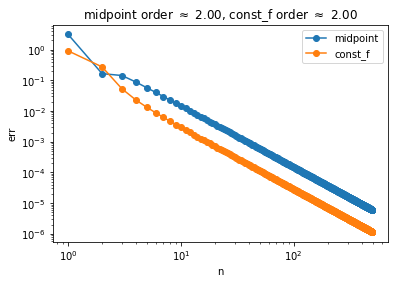

In [252]:
plt.figure()
plt.plot(n_vals, midpoint_errs, 'o-', label='midpoint')
plt.plot(n_vals, const_f_errs, 'o-', label='const_f')
plt.xlabel('n')
plt.ylabel('err')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title(r'midpoint order $\approx$ {:.2f}, const_f order $\approx$ {:.2f}'.format(
    midpoint_order, const_f_order
))
plt.show()

Both are 2nd order. const_f has lower error.

---

## Larger interval, but not entire range

In [253]:
eps = 0.1
a = 0+eps
b = np.pi-eps

In [254]:
true_val = true_integral(f, a, b)
midpoint_vals = np.array([comp_midpoint(f, a, b, n) for n in n_vals])
const_f_vals = np.array([comp_const_f(f, a, b, n) for n in n_vals])

midpoint_errs = np.abs(midpoint_vals - true_val)
const_f_errs = np.abs(const_f_vals - true_val)

In [255]:
midpoint_order = get_order(n_vals[int(N/2):], midpoint_errs[int(N/2):])
const_f_order = get_order(n_vals[int(N/2):], const_f_errs[int(N/2):])

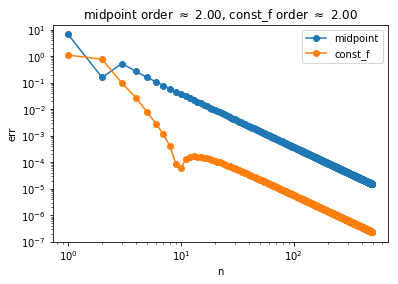

In [256]:
plt.figure()
plt.plot(n_vals, midpoint_errs, 'o-', label='midpoint')
plt.plot(n_vals, const_f_errs, 'o-', label='const_f')
plt.xlabel('n')
plt.ylabel('err')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title(r'midpoint order $\approx$ {:.2f}, const_f order $\approx$ {:.2f}'.format(
    midpoint_order, const_f_order
))
plt.show()

Both 2nd order, midpoint slightly better.

---

## Now, integrate over $[0, \pi]$

In [257]:
def comp_midpoint_pi(f, n):
    dx = np.pi/n
    # Midpoints
    xm = dx*(np.arange(n)+0.5)
    
    return dx*np.sum(f(xm)*np.sin(xm))

In [258]:
def comp_const_f_pi(f, n):
    dx = np.pi/(n-1)
    
    # Midpoints
    xm = dx * np.arange(n)
    # Edges
    xe = dx * (np.arange(n-1)+0.5)
    
    # Endpoint weights 
    we = 1 - np.cos(dx/2)
    # Interior weights
    wi = np.cos(xe[:-1]) - np.cos(xe[1:])
    # All weights
    w = np.concatenate([[we], wi, [we]])
    
    return np.sum(f(xm)*w)

---

In [259]:
N = 500
n_vals = range(2, N)

In [260]:
true_val_pi = true_integral(f, 0, np.pi)
midpoint_vals_pi = np.array([comp_midpoint_pi(f, n) for n in n_vals])
const_f_vals_pi = np.array([comp_const_f_pi(f, n) for n in n_vals])

midpoint_errs_pi = np.abs(midpoint_vals_pi - true_val_pi)
const_f_errs_pi = np.abs(const_f_vals_pi - true_val_pi)

In [261]:
midpoint_order_pi = get_order(n_vals[int(N/2):], midpoint_errs_pi[int(N/2):])
const_f_order_pi = get_order(n_vals[int(N/2):], const_f_errs_pi[int(N/2):])

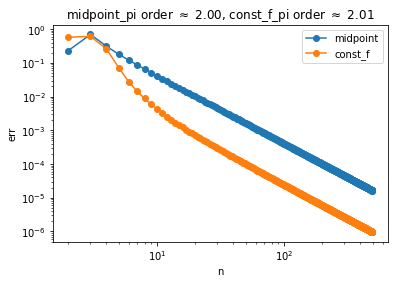

In [262]:
plt.figure()
plt.plot(n_vals, midpoint_errs_pi, 'o-', label='midpoint')
plt.plot(n_vals, const_f_errs_pi, 'o-', label='const_f')
plt.xlabel('n')
plt.ylabel('err')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title(r'midpoint_pi order $\approx$ {:.2f}, const_f_pi order $\approx$ {:.2f}'.format(
    midpoint_order_pi, const_f_order_pi
))
plt.show()

In some circumstances, midpoint is **4th order** (when function is odd?), const_f initially 4th order, then 2nd order asymptotically.

In general, though, both are 2nd order, and const_f seems to be superior.